

***In this project, the dataset named Telco Customer Churn from Kaggle was used. Each row represents a customer, each column contains the customer’s attributes. This dataset contains 21 columns (variables) and 7043 rows (customers) with information such as customerID, gender, Phone Service, and Internet Service.***

***Analysis of data columns to identify independent and dependent variables***

***X is the independent variables — the variables we are using to make predictions***


***y is dependent variable — variable we are trying to predict or estimate***

***Churn — output value, predict variable***

# So, first of all we imported the required libraries needed 

In [1]:
# Data processing
import pandas as pd # type: ignore
import numpy as np # type: ignore

# Data Visualization
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore

# Label Encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # type: ignore
from sklearn.preprocessing import StandardScaler # type: ignore

# Data reports and accuracy of models
from sklearn.metrics import classification_report, accuracy_score, r2_score, euclidean_distances, precision_score, confusion_matrix # type: ignore

# Logistic Regression
from sklearn.linear_model import LogisticRegression # type: ignore

# Splitting dataset
from sklearn.model_selection import train_test_split # type: ignore

# Random Forest regression
from sklearn.ensemble import RandomForestRegressor # type: ignore

# pipeline
from sklearn.pipeline import Pipeline # type: ignore

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix


# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")

c:\ProgramData\anaconda4\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Next, after installing the  the required packages ,Data Reading. Let’s import the dataset.

- The first step of the analysis consists of reading and storing the data in a Pandas data frame using the pandas.read_csv function we loaded the dataframe, by reading the csv file provided 

In [2]:
#Read and load the csv file
df = pd.read_csv("telco_customer_churn.csv")

# 1. UNDERSTANDING THE DATASET

### After reading the csv as a df, we went ahead to check the first 5 rows  from the top . This returned the first 5 rows with the names of cthe columns in addition to the specified rows

In [3]:
# Checking for the first 5rows of the dataset
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Checking for the last 5rows of the dataset
df.tail(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


### Next, we checked the shape of our dataframe uisng .shape

In [ ]:
# Checking the shape of  the dataset
print(df.shape)

(7043, 21)


- We found out that the shape of our dataframe is (7043, 21), this means that the datafrem has 7043 rows and 21 columns

### Show All of The Columns

In [ ]:
#Displaying column names
display(df.columns.values)

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

- So, here we can see all of the columns name and immediately we can see some interesting columns like customer Id, gender, phone service, internet service, contract, monthly charges, tenure and obviously churn

## We also checked number of unique  values in every column

In [ ]:
# Check the number of unique values in columns
print(df.nunique())

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


# 2. Exploratory Data Analysis and Data Cleaning 
- Before starting any data analysis, it's crucial to
understand the dataset you're working with
- This includes understanding the structure of the data,
the meaning of each column, and any potential issues
or challenges

### Next we checked for the info for our df so as we can get a coincise summary of the dataframe

In [ ]:
#info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- After checking the info of our dataframe, we have 7043 entries and 21 columns. Also, df.info() gave us the nammes of our columns that we have in the df and the data types of each columns. Also,  the number of non null values wa disp;ayed for eah column as shown.
- So our datfarme has three datatypes( floats for 1 column which si monthly charges, int 64 for two columns which include seniour citizena  and tenure and the  other 18 columns are have object datatype)
- Apparently, there are no null values on the data set; however, we observe that the column TotalCharges was wrongly detected as an object. This column represents the total amount charged to the customer and it is, therefore, a numeric variable. For further analysis, we need to transform this column into a numeric data type.

In [ ]:
# transform the column TotalCharges into a numeric data type
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
#Checking for the first rows to see the changes in total charges columns
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Checking the datatypes of every column
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

- So the Total charges columns is now numeric ( a float datataype)

### Next we checked for null values  in our datafarme

In [ ]:
# Checking for null values
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

### Null observations of the _TotalCharges_ column

In [ ]:
# Checking null values on total charges column
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


- We can now observe that the column TotalCharges has 11 missing values.

In [ ]:
# Checking sum of null values in the totalcharges column
df['TotalCharges'].isnull().sum()

11

It can also be noted that the Tenure column is 0 for these entries even though the MonthlyCharges column is not empty. So we went ahead to check and see if there are any other 0 values in the tenure column.

In [ ]:
#Checking for any other 0 values in tenure column
print(df[df['tenure'] == 0].index)

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')


- We can see that there are no additional missing values in the Tenure column.
- So Let's delete the rows with missing values in Tenure columns since there are only 11 rows and deleting them will not affect the data.

In [ ]:
# DEleting the rows with NAN values in Tenure column
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
print(df[df['tenure'] == 0].index)

Index([], dtype='int64')


-To solve the problem of missing values in TotalCharges column, we decided to fill in the NAN values
- so we replace the missing values with average (mean). In this case, using average  which is a good strategy.

In [ ]:
# Calculate the average of non-null values in the 'TotalCharges' column
average_total_charges = df['TotalCharges'].mean()

# Replace missing values with the average
df['TotalCharges'].fillna(average_total_charges, inplace=True)

In [ ]:
# Checking for null values in Total charges column
df['TotalCharges'].isnull().sum()

0

- so as we can see we have fixed the missing values on the Totalcharges column

### So we checked again for the null values to see if every column is now well fixed

In [ ]:
# Checking for null values in the columns
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

- After running the cell we can see the columns name in the left and number for missing values for each column on the right and right every single value is zero so this tells us that this data has no missing values.

In [ ]:
# checking non null 
df.notnull().sum()

customerID          7032
gender              7032
SeniorCitizen       7032
Partner             7032
Dependents          7032
tenure              7032
PhoneService        7032
MultipleLines       7032
InternetService     7032
OnlineSecurity      7032
OnlineBackup        7032
DeviceProtection    7032
TechSupport         7032
StreamingTV         7032
StreamingMovies     7032
Contract            7032
PaperlessBilling    7032
PaymentMethod       7032
MonthlyCharges      7032
TotalCharges        7032
Churn               7032
dtype: int64

### Next step  involved checking for the description of our dataset in the df using _decribe()_

In [ ]:
# Checking decriiption of data using describe()
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


- From the summmary we can see that the decribe function did apply on the  four columns since they  are numerical.
- So lets us get insights from this 
- The dataset consists of 7032 entries. Regarding the 'SeniorCitizen' column, it indicates whether a customer is a senior citizen, with a mean value of approximately 0.16 and a standard deviation of about 0.37. This suggests that senior citizens make up a relatively small portion of the customer base, with a maximum value of 1 indicating that some customers are indeed senior citizens.

- Moving to the 'tenure' column, which represents the number of months a customer has stayed with the service, the mean tenure is approximately 32.42 months, with a standard deviation of around 24.55. This indicates a wide range of tenures among customers, ranging from 0 months to a maximum of 72 months, with a median (50th percentile) tenure of 29 months.

- Regarding 'MonthlyCharges', which denotes the monthly service charges for customers, the mean monthly charge is approximately $64.79, with a standard deviation of about $30.09. The charges vary considerably among customers, with a minimum of $18.25 and a maximum of $118.75. The median monthly charge is $70.35, indicating that half of the customers pay more than this amount monthly.

- 'TotalCharges' represents the total charges incurred by each customer. The mean total charge is approximately $2283.30, with a standard deviation of around $2266.00. The total charges range from $18.80 to $8684.80, with a median total charge of 1397.45. This suggests significant variability in the total charges incurred by customers, with some customers having substantially higher charges than others.








### Next we checked to see if we have any duplicated values in out dataframe

In [ ]:
# Checking for duplicates
df[df.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


- As we can see above, we have no duplicated rows in our dataframe
- Observation: No Duplicated Value. Good, continue

In [ ]:
#Dropping any duplicates
df = df.drop_duplicates()

In [ ]:
#Dropping CustomerID Column
df.drop(columns='customerID', inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


- we  dropped the Customer ID columns  becauase- this column isn't an attribute that impact in the target. So there's no need to keep it.

## Anomaly Detection

## Checking _outliers_ in numerical columns

In [ ]:
#Checking for outliers
num_cols = df.select_dtypes(include = ["int", "float"])
print(num_cols.columns)

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')


#### Visualisation of the numerical columns distribution

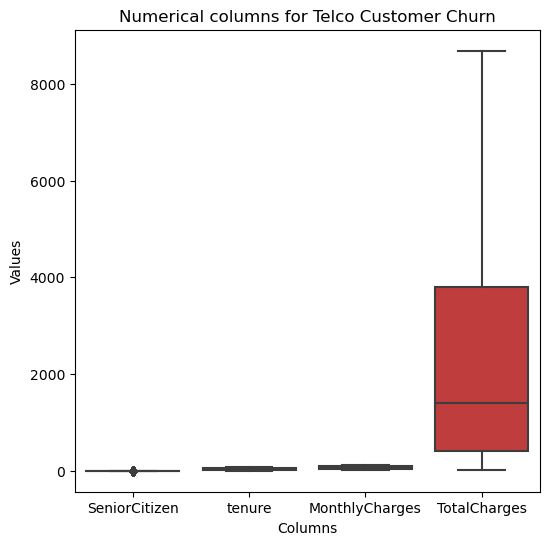

In [ ]:
#bOXPLOT VISULISATION FOR OUTLIERS
plt.figure(figsize=(6, 6))
sns.boxplot(num_cols)
plt.xlabel("Columns")
plt.ylabel("Values")
plt.title("Numerical columns for Telco Customer Churn")
plt.show()

- We can see thet the numerical columns (Senior Citizen, tenure, MonthlyCharges and TotalCharges have not ouliers)

## Next we checked for unique values in each categorical columns 

In [ ]:
#unique values in senior citizen column
def print_column_unique(df):
    ''' Prints Unique values of Categorical Columns.'''
    for col in df:
        if df[col].dtypes == 'object':
            print(f'{col} : {df[col].unique()}')

In [ ]:
print_column_unique(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


### Checking correlation of the columns.

In [29]:
# Step 1: Select numerical columns
numerical_cols = df.select_dtypes(include=['int', 'float'])

# Step 2: Compute correlation matrix
correlation_matrix = numerical_cols.corr()
correlation_matrix 


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015683,0.219874,0.102411
tenure,0.015683,1.000000,0.246862,0.825880
MonthlyCharges,0.219874,0.246862,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


### Heatmap for the correlation matrix

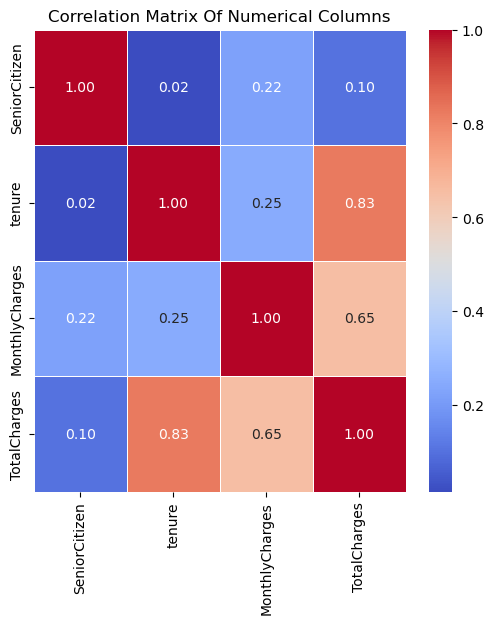

In [ ]:
# Plotting a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(numerical_cols.corr(), annot=True, cmap="coolwarm",fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Of Numerical Columns")
plt.show()

- SeniorCitizen and tenure: The correlation coefficient between SeniorCitizen and tenure is very (0.015683	), indicating a weak positive correlation. This suggests that there is a very slight tendency for SeniorCitizens to have slightly longer or shorter tenure, but the correlation is almost negligible.
- SeniorCitizen and MonthlyCharges: The correlation coefficient between SeniorCitizen and MonthlyCharges is moderate(0.219874)), indicating a moderate positive correlation. This suggests that there is a moderate tendency for SeniorCitizens to have slightly higher monthly charges compared to non-SeniorCitizens.
- SeniorCitizen and TotalCharges: The correlation coefficient between SeniorCitizen and TotalCharges is relatively low (0.102411), indicating a weak positive correlation. This suggests that there is a weak tendency for SeniorCitizens to have slightly higher total charges compared to non-SeniorCitizens, but the correlation is not strong.
- tenure and MonthlyCharges: The correlation coefficient between tenure and MonthlyCharges is moderate (0.246862), indicating a moderate positive correlation. This suggests that there is a moderate tendency for customers with longer tenure to have slightly higher monthly charges.
- tenure and TotalCharges: The correlation coefficient between tenure and TotalCharges is strong (0.825880), indicating a strong positive correlation. This suggests that there is a strong tendency for customers with longer tenure to have significantly higher total charges.
- MonthlyCharges and TotalCharges: The correlation coefficient between MonthlyCharges and TotalCharges is moderate (0.651065), indicating a moderate positive correlation. This suggests that there is a moderate tendency for customers with higher monthly charges to have higher total charges.

- From previous analysis of our dataframe, some columns have only two catgorical values(yes or no), which we will conert to 1 and 0 respectively.

## Next we got  Customer Churn Count
- Our  question is, how many people are churning and how many people are not churning or being retained and stained. So, in order to get that count we just have to type,

In [ ]:
#Value counts churn
df['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

- Now we can see that 5163 customers for this company did not churn and 1869customers of this company will churn

## We again visualised this just to see  the distribution  of columns value counts


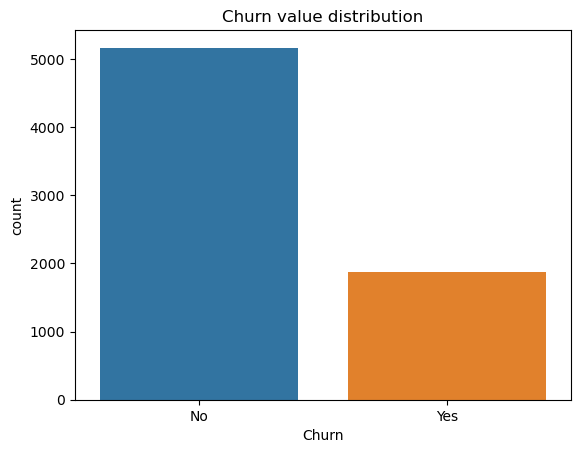

In [ ]:
# churn visualisation
sns.countplot(x='Churn', data=df)
plt.title('Churn value distribution')
plt.show()

- Now we can visually see those same counts as bar chart here so it make it little bit more obvious that there are customers that are staying with the company then there are the customer that will left the company. Those who stay are less as compared to those no churn

## Next we looked at gender  value counts and visualised it

In [ ]:
## Next we looked at gender 
df['gender'] . value_counts()

gender
Male      3549
Female    3483
Name: count, dtype: int64

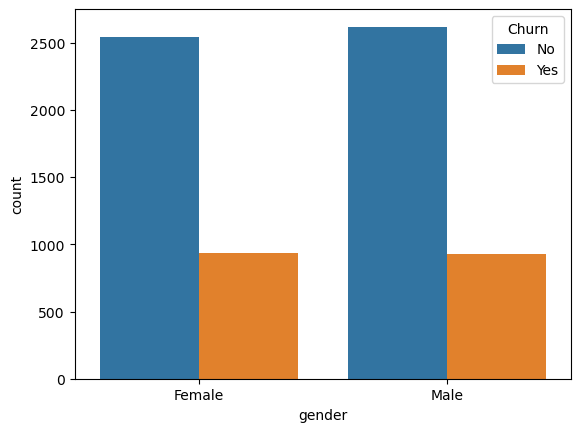

In [ ]:
#Countplot for gender and churn
sns.countplot(x=df['gender'],hue=df['Churn'])
plt.show()

- From the vsualisation, we can see both femals and male  counts for Yes Curn and no Churn

## Next we looked at Partner counts and visusialised it

In [ ]:
#Value counts for partner 
df['Partner'].value_counts()

Partner
No     3639
Yes    3393
Name: count, dtype: int64

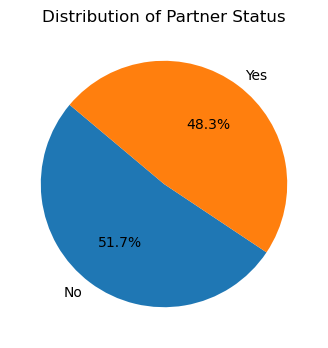

In [ ]:
# Calculate value counts for the "Partner" column
partner_counts = df['Partner'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(4, 4))  # Set the figure size
plt.pie(partner_counts, labels=partner_counts.index, autopct='%1.1f%%', startangle=140)

# Add title
plt.title('Distribution of Partner Status')

# Show the pie chart
plt.show()

- We clearly can see we have 3639 partners for yes which is represneted by 51.7% while we have 3393 for no which is 48.3%

## Next we looked at Depends counts and visusialised it

In [ ]:
#Value counts for depents
df['Dependents'].value_counts()

Dependents
No     4933
Yes    2099
Name: count, dtype: int64

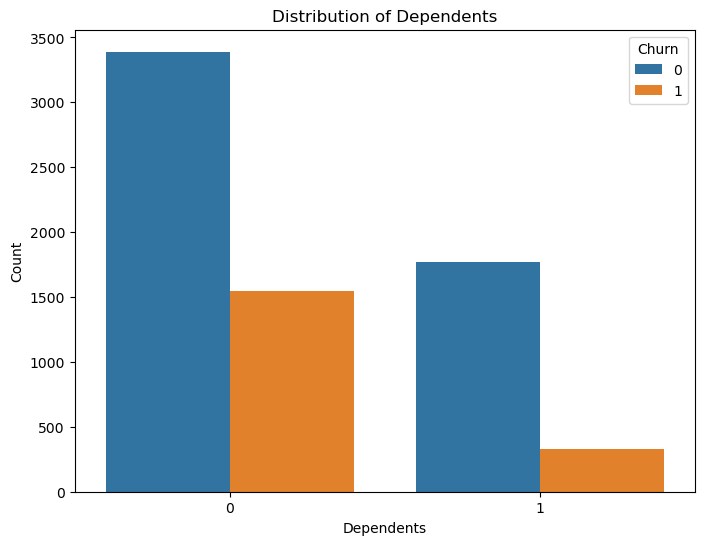

In [72]:
# plotting value counts of dependents

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Dependents', hue='Churn')
plt.title('Distribution of Dependents')
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.show()


- The "Dependents" column indicates whether customers have dependents or not. Among the customers, 4933 don't have dependents, while 2099 do. This distribution suggests a larger proportion of customers don't have dependents.

## Next we looked at Phone services counts and visusialised it

In [ ]:
# phone servive value counts
df['PhoneService'].value_counts()

PhoneService
Yes    6352
No      680
Name: count, dtype: int64

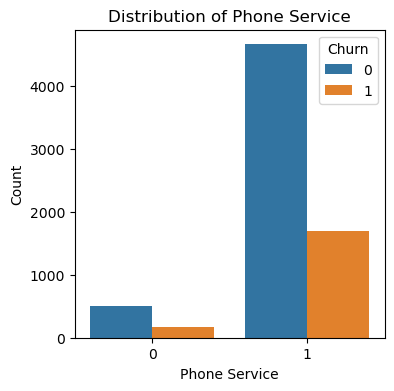

In [ ]:
#plotting phoneservice counts and churn

plt.figure(figsize=(4, 4))
sns.countplot(data=df, x='PhoneService', hue='Churn')
plt.title('Distribution of Phone Service')
plt.xlabel('Phone Service')
plt.ylabel('Count')
plt.show()



- There are 6532 customers with phone service ("Yes") and 680 customers without phone service ("No"). This distribution suggests that the majority of customers have phone service.

## Next we looked at multiple lines counts and visusialised it

In [ ]:
#multiplelines value counts
df['MultipleLines'].value_counts()

MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64

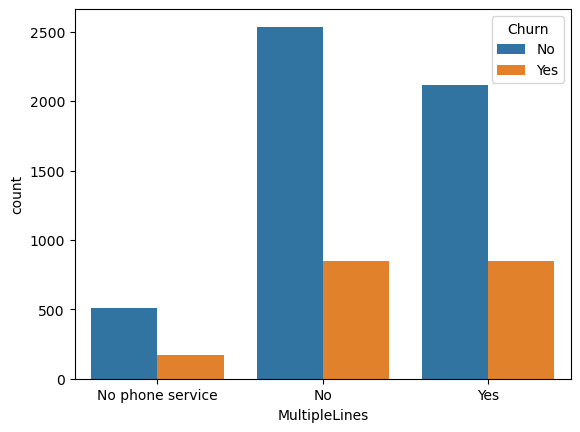

In [ ]:
# Create a countplot using seaborn
sns.countplot(x=df['MultipleLines'], hue=df['Churn'])

# Show the plot
plt.show()

- The "MultipleLines" column denotes whether customers have multiple lines or not, with three categories: "No", "Yes", and "No phone service". Among customers, 3385 have no multiple lines, 2967 have multiple lines, and 680 have no phone service. The countplot visualizes churn status for each category.

## Next we looked at payment methods counts and visusialised it

In [ ]:
#payment method value counts
df['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: count, dtype: int64

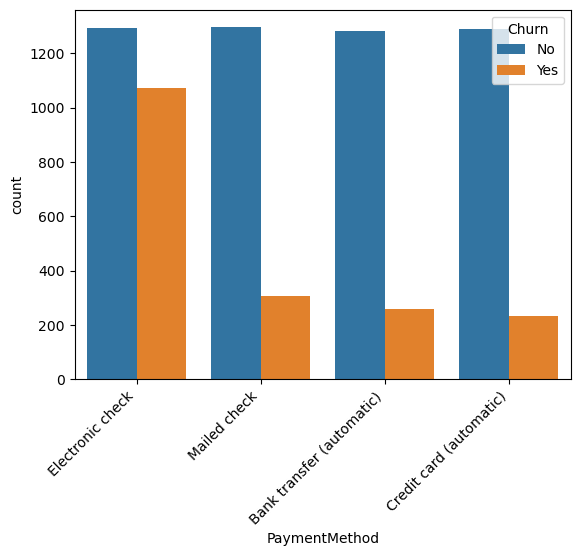

In [ ]:
# plotting payment method visualisation
sns.countplot(x=df['PaymentMethod'], hue=df['Churn'])

plt.xticks(rotation=45, ha='right')
plt.show()

- Electronic check constitutes the largest percentage, at 33%, and also the largest percentage of Churn, at 44%. We understand from this that there is a problem with the Electronic check service.

## Next we looked at contract counts and visusialised it

In [ ]:
# cONTRACT VALUE COUNTS
df['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1685
One year          1472
Name: count, dtype: int64

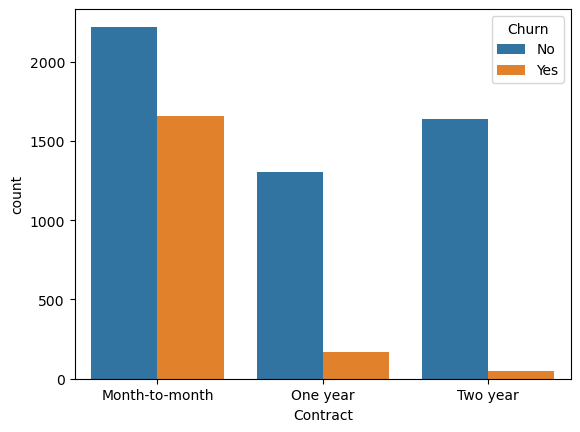

In [ ]:
# Visulising contract value counts and churn
sns.countplot(df, x='Contract',hue='Churn');

- The "Month-to-month" contract type holds the largest share at 55%, with the highest churn rate at 44%. "One year" contracts represent 21%, with a churn rate of 10%. "Two year" contracts make up 24%, with only a 3% churn rate. This suggests higher turnover among new customers compared to loyal long-term ones.

## Next we looked at Internet Service counts and visusialised it

In [ ]:
# Internet service value counts
df['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64

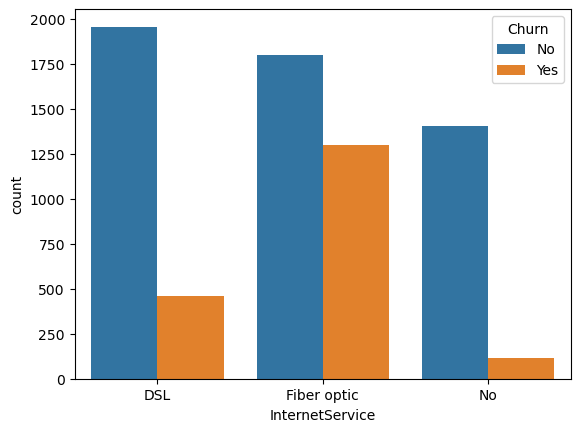

In [ ]:
# Create a countplot using seaborn and churn
sns.countplot(data=df, x='InternetService', hue='Churn')

plt.show()

- The "InternetService" column indicates the type of internet service each customer has. Among customers, 3096 have fiber optic internet, 2416 have DSL, and 1520 do not use the internet. This breakdown suggests a significant portion of customers utilize fiber optic internet, followed by DSL, while some opt not to use the internet at all.
- Among the internet service types, fiber optics dominate with 44%, with a high churn rate of 42%. DSL follows with 34%, with a churn rate of 16%. Customers without internet service make up 21%, with only a 10% churn rate. This suggests potential issues with fiber optic internet services leading to higher churn rates.

<span style="color:red"><b><<<<<<< local</b></span>

## We checked the Churn column count. To check if the target values are balanced or imbalanced.

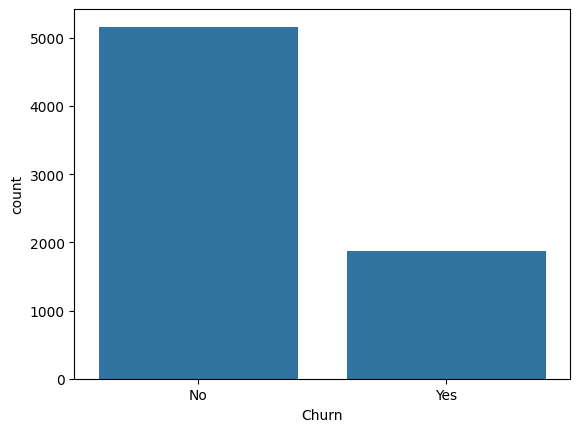

In [48]:
# Countplot to visualize the distrbution in the churn column
sns.countplot(data=df, x='Churn')

plt.show()

- From the visual above, the count of no(0-values) is more than the value of yes(1-values). This is thus an imbalanced dataset, and hence creating a predictive model from the dataset will result to bias towards 0 values. 
- Such data would result into more `True Negative`(Suggesting more non-churn results) values than the `True Positives`(Suggesting churn results).
- Therefore, to overcome this, we will oversample the data in the Feature Engineering section, as it involves feature modification.

<span style="color:red"><b>=======</b></span>

## Statistical analysis and tests

- Looked at gender and churn 

Null Hypothesis (H0): There is no difference in the proportion of churned customers between female and male groups.

Alternative Hypothesis (H1): There is a difference in the proportion of churned customers between female and male groups.

In [49]:
import statsmodels.api as sm

# Create a contingency table
gender_contingency = pd.crosstab(df['Churn'], df['gender'])

# Calculate proportions of churned customers for each gender
female_churn_proportion = gender_contingency.loc['Yes', 'Female'] / gender_contingency.loc['No', 'Female']
male_churn_proportion = gender_contingency.loc['Yes', 'Male'] / gender_contingency.loc['No', 'Male']

# Perform two-proportion z-test
z_score, p_value = sm.stats.proportions_ztest([gender_contingency.loc['Yes', 'Female'], gender_contingency.loc['Yes', 'Male']],
                                              [gender_contingency.loc['No', 'Female'], gender_contingency.loc['No', 'Male']])

alpha = 0.05

print('Z-score:', z_score)
print('P-value:', p_value)

if p_value < alpha:
    print("Reject the null hypothesis. There is a difference in the proportion of churned customers between female and male groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the proportion of churned customers between female and male groups.")


Z-score: 1.0469783366062821
P-value: 0.2951095697377315
Fail to reject the null hypothesis. There is no significant difference in the proportion of churned customers between female and male groups.


- Next we looked at contract Month-to-Month and Churn

In [75]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['Contract'], df['Churn'])

# Perform the Chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

alpha = 0.05

print('Chi-square statistic value:', chi2_stat)
print('P-value:', p_value)
print('Degree of Freedom:', dof)
print('Expected Values:\n', expected)

if p_value < alpha:
    print("Reject the null hypothesis. There is an association between customer churn and having a Month-to-Month contract.")
else:
    print("Fail to reject the null hypothesis. There is no association between customer churn and having a Month-to-Month contract.")


Chi-square statistic value: 1179.5458287339445
P-value: 7.326182186265472e-257
Degree of Freedom: 2
Expected Values:
 [[2845.08319113 1029.91680887]
 [1080.76450512  391.23549488]
 [1237.15230375  447.84769625]]
Reject the null hypothesis. There is an association between customer churn and having a Month-to-Month contract.


- Internet Service counts and Churn

Null Hypothesis (H0): There is no association between customer churn and internet service type.

Alternative Hypothesis (H1): There is an association between customer churn and internet service type.

In [76]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['InternetService'], df['Churn'])

# Perform the Chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

alpha = 0.05

print('Chi-square statistic value:', chi2_stat)
print('P-value:', p_value)
print('Degree of Freedom:', dof)
print('Expected Values:\n', expected)

if p_value < alpha:
    print("Reject the null hypothesis. There is an association between customer churn and internet service type.")
else:
    print("Fail to reject the null hypothesis. There is no association between customer churn and internet service type.")


Chi-square statistic value: 728.6956143058694
P-value: 5.831198962237274e-159
Degree of Freedom: 2
Expected Values:
 [[1773.86348123  642.13651877]
 [2273.12969283  822.87030717]
 [1116.00682594  403.99317406]]
Reject the null hypothesis. There is an association between customer churn and internet service type.


<span style="color:red"><b>>>>>>>> remote</b></span>

# 3. FEATURE ENGINEERING
The aim of feature engineering is to make a machine learning model for better learning and get more accuracy. In this article, we will label encoding for categorical and feature calling for numerical variable

### Encoding the categorical columns

- We first change all the columns that have yes/no as the values to 1/0.
- We list the categorical columns with yes/no first then encode them.

In [ ]:
object_columns = df.select_dtypes(include=['object'])

'''
We now look at the categorical columns and the unique values each column contains thus, able to see what columns to encode and their importance to the model.
'''
for col in object_columns.columns:
    print(f"{col} - {object_columns[col].nunique()} Unique Values")
    print(object_columns[col].unique())
    print()

gender - 2 Unique Values
['Female' 'Male']

Partner - 2 Unique Values
['Yes' 'No']

Dependents - 2 Unique Values
['No' 'Yes']

PhoneService - 2 Unique Values
['No' 'Yes']

MultipleLines - 3 Unique Values
['No phone service' 'No' 'Yes']

InternetService - 3 Unique Values
['DSL' 'Fiber optic' 'No']

OnlineSecurity - 3 Unique Values
['No' 'Yes' 'No internet service']

OnlineBackup - 3 Unique Values
['Yes' 'No' 'No internet service']

DeviceProtection - 3 Unique Values
['No' 'Yes' 'No internet service']

TechSupport - 3 Unique Values
['No' 'Yes' 'No internet service']

StreamingTV - 3 Unique Values
['No' 'Yes' 'No internet service']

StreamingMovies - 3 Unique Values
['No' 'Yes' 'No internet service']

Contract - 3 Unique Values
['Month-to-month' 'One year' 'Two year']

PaperlessBilling - 2 Unique Values
['Yes' 'No']

PaymentMethod - 4 Unique Values
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

Churn - 2 Unique Values
['No' 'Yes']



- We now consider encoding the remaining categorical column using LabelEncoder.

In [ ]:
def encode_column(df, col):
  """
  Encodes a single categorical column in a pandas dataframe using LabelEncoder.

  Args:
      df (pandas.DataFrame): The dataframe containing the column to encode.
      col (str): The name of the column to encode.

  Returns:
      pandas.DataFrame: The dataframe with the encoded column.
  """
  encoder = LabelEncoder()
  df[col] = encoder.fit_transform(df[col])
  return df

In [ ]:
categorical_columns = df.select_dtypes(include=['object'])
for col in categorical_columns.columns:
    new_df = encode_column(df, col)

new_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [ ]:
# Remaining object columns
object_columns = df.select_dtypes(include=['object'])
print("\nRemaining object columns after boolean conversions:")
print(object_columns.columns)


Remaining object columns after boolean conversions:
Index([], dtype='object')


- We have no remaining categorical column on the dataset. Moreover, the encoded columns have been encoded not with order of precedence but jus in order of how they follow each other, thus we have escaped an error that could be introduced into our model of bias.

We checked the correlation among tyhe variables after encoding

In [54]:
# Calculating the correlation matrix
corr_matrix = new_df.corr()

corr_matrix

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.006908,-0.002236,-0.014899,-0.011920,0.001348,-0.006695,-0.005624,-0.008920,0.000095,-0.011902,0.016942,-0.013779,0.000048,-0.008545
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.146287,-0.032160,-0.127937,-0.013355,-0.021124,-0.151007,0.031019,0.047088,-0.141820,0.156258,-0.038158,0.219874,0.102411,0.150541
Partner,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.142717,0.000513,0.150610,0.153045,0.165614,0.126488,0.136679,0.129907,0.294094,-0.013957,-0.156232,0.097825,0.319072,-0.149982
Dependents,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024975,0.044030,0.151198,0.090231,0.079723,0.132530,0.046214,0.022088,0.240556,-0.110131,-0.041989,-0.112343,0.064653,-0.163128
tenure,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.343673,-0.029835,0.327283,0.372434,0.372669,0.324729,0.290572,0.296785,0.676734,0.004823,-0.370087,0.246862,0.825880,-0.354049
PhoneService,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,-0.020504,0.387266,-0.014163,0.024040,0.004718,-0.018136,0.056393,0.043025,0.003019,0.016696,-0.005499,0.248033,0.113008,0.011691
MultipleLines,-0.006908,0.146287,0.142717,-0.024975,0.343673,-0.020504,1.000000,-0.108849,0.007306,0.117276,0.122614,0.010941,0.175403,0.181705,0.111029,0.165306,-0.176598,0.433905,0.453202,0.038043
InternetService,-0.002236,-0.032160,0.000513,0.044030,-0.029835,0.387266,-0.108849,1.000000,-0.028003,0.036735,0.045558,-0.025626,0.108190,0.097967,0.099579,-0.138166,0.084504,-0.322173,-0.175691,-0.047097
OnlineSecurity,-0.014899,-0.127937,0.150610,0.151198,0.327283,-0.014163,0.007306,-0.028003,1.000000,0.184942,0.175789,0.284875,0.044399,0.056313,0.373980,-0.157723,-0.096593,-0.053576,0.254473,-0.289050
OnlineBackup,-0.011920,-0.013355,0.153045,0.090231,0.372434,0.024040,0.117276,0.036735,0.184942,1.000000,0.187646,0.195581,0.147085,0.137083,0.280617,-0.012697,-0.125534,0.119943,0.375556,-0.195290


- Visualising the correlation

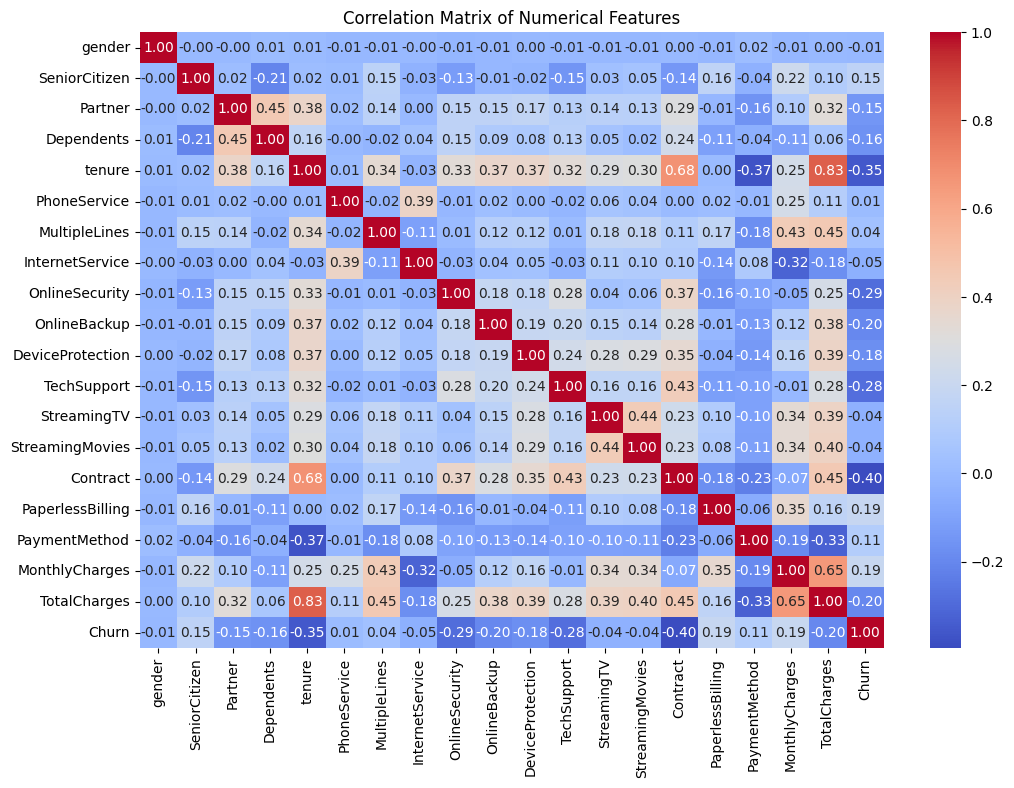

In [55]:
# Calculating the correlation matrix
corr_matrix = new_df.corr()

# Plotting the heatmap of the correlation matrix
plt.figure(figsize=(12, 8), facecolor='white')
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

- The correlation matrix shows the pairwise correlation coefficients between different numerical features in the dataset. Each cell in the matrix represents the correlation coefficient between two features, ranging from -1 to 1. Here's a brief explanation:

- Values close to 1 indicate a strong positive correlation, meaning that as one feature increases, the other feature also tends to increase.
- Values close to -1 indicate a strong negative correlation, meaning that as one feature increases, the other feature tends to decrease.
Values close to 0 indicate a weak or no correlation between the features.

For example:

- The correlation coefficient between "tenure" and "TotalCharges" is 0.83, indicating a strong positive correlation. This suggests that customers with longer tenure tend to have higher total charges.
The correlation coefficient between "Partner" and "Dependents" is 0.45, indicating a moderate positive correlation. This suggests that customers who have a partner are more likely to have dependents.
Overall, the correlation matrix helps us understand the relationships between different features in the dataset, which can be useful for feature selection and understanding the data's underlying structure.

## Preprocessing

We started  by preprocessing the data so that we can run it through the model algorithm. This involved

- Splitting the data into features and labels.
- Standardising the data using sklearn's StandardScaler.
- Splitting the data into training and testing data.

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# splitting data  into fetaures and labels
X = new_df.drop('Churn', axis=1)
y = new_df['Churn']

# Call the RandomOverSampler in it's default format
ros = RandomOverSampler()

# Standardise the data
standard_scaler = StandardScaler()
X_transformed = standard_scaler.fit_transform(X)

X_resampled, y_resampled = ros.fit_resample(X_transformed, y)

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

X_transformed.ndim

2

In [ ]:
# checking  the shapes
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (8260, 19)
Shape of X_test: (2066, 19)
Shape of y_train: (8260,)
Shape of y_test: (2066,)


# 4. MODEL SLECTION, TRAINING AND EVALUATION

- Fitting the model. We started by uisng logistic regression
## Logistic Regression

- Training. We  now fit a logistic regression model to our data 

In [ ]:
# Creating and training the logistic regression model and # Initialize and train the logistic regression model with L2 regularization
model = LogisticRegression(penalty='l2')
model.fit(X_train, y_train)

<<<<<<< local


LogisticRegression()

>>>>>>> remote


<<<<<<< local <removed>


LogisticRegression()

>>>>>>> remote <modified: text/html; unchanged: text/plain>


- predict the labels for our test set and examine the performance of our model using a confusion matrix.

In [ ]:
# Making predictions and evaluating the model
y_pred = model.predict(X_test)

In [ ]:

# Assuming y_test and y_pred are your true labels and predicted labels respectively
from sklearn.metrics import confusion_matrix, classification_report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[759 278]
 [203 826]]


- Visualised the confusion matrix

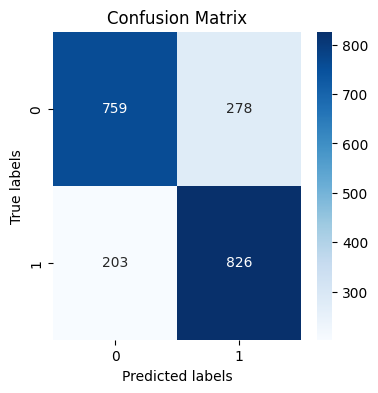

In [ ]:

# Assuming y_test and y_pred are your true labels and predicted labels respectively
cm = confusion_matrix(y_test, y_pred)

# Plotting the heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In our specific caase here from the confion matrix, 

- True Negatives (TN): 759
- False Positives (FP): 278
- False Negatives (FN): 203
- True Positives (TP): 826

This means:

- 759 instances were correctly classified as "No Churn" (True Negatives).
- 278 instances were incorrectly classified as "Churn" when they were actually "No Churn" (False Positives).
- 203 instances were incorrectly classified as "No Churn" when they were actually "Churn" (False Negatives).
- 826 instances were correctly classified as "Churn" (True Positives).

- Looking at the classification report

In [ ]:
print("The accuracy score of the LR is:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

The accuracy score of the LR is: 0.7671829622458858
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.73      0.76      1037
           1       0.75      0.80      0.77      1029

    accuracy                           0.77      2066
   macro avg       0.77      0.77      0.77      2066
weighted avg       0.77      0.77      0.77      2066



**Accuracy**

- The model achieves an overall accuracy of 0.77, meaning it correctly predicts the churn status for approximately 77% of the customers in the test dataset.

**Precision**
- For class 0 (No Churn), the precision is 0.79, indicating that when the model predicts a customer will not churn, it is correct approximately 79% of the time.
- For class 1 (Churn), the precision is 0.75, suggesting that when the model predicts a customer will churn, it is correct approximately 75% of the time.

**Recall**

- For class 0 (No Churn), the recall is 0.73, indicating that the model correctly identifies approximately 73% of the actual non-churn customers.
- For class 1 (Churn), the recall is 0.80, suggesting that the model corrctly identifies approximately 80% of the actual churn cases.

**F1-score**

- The F1-score for class 0 is 0.76, which balances precision and recall for the non-churn class.
- The F1-score for class 1 is 0.77, indicating a lower balance between precision and recall for the churn class.
Support:
- There are 1037 instances of class 0 (No Churn) and 1029 instances of class 1 (Churn) in the test dataset.

The model performs reasonably well in identifying customers in both classes 0 and 1, with relatively high precision and recall. Further optimization of the model may be necessary to improve its ability to detect the result more accurately, possibly by adjusting the model's parameters, trying different algorithms, or exploring additional features.

# Random Forest Classifier

- Training. We now fit a random forest classification model to our data using sklearn's RandomForestClassifier with default parameters, a random state of 42, and the number of trees set to 100.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)

<<<<<<< local


RandomForestClassifier(random_state=42)

>>>>>>> remote


<<<<<<< local <removed>


RandomForestClassifier(random_state=42)

>>>>>>> remote <modified: text/html; unchanged: text/plain>


- Testing- Let's predict the labels for our test set and examine the performance of our model using a confusion matrix.

Confusion Matrix for Random Forest:
 [[864 173]
 [ 52 977]]


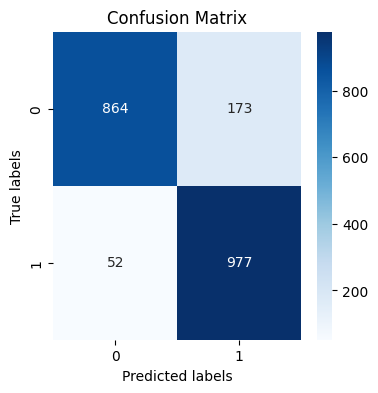

The accuracy score of the RF is: 0.8910939012584704
Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.94      0.83      0.88      1037
           1       0.85      0.95      0.90      1029

    accuracy                           0.89      2066
   macro avg       0.90      0.89      0.89      2066
weighted avg       0.90      0.89      0.89      2066



In [ ]:
from sklearn.metrics import confusion_matrix

# Predictions using the Random Forest model
y_pred_forest = forest.predict(X_test)

# Confusion matrix for the Random Forest model

conf_matrix_forest = confusion_matrix(y_test, y_pred_forest)
print("Confusion Matrix for Random Forest:\n", conf_matrix_forest)

# Assuming y_test and y_pred are your true labels and predicted labels respectively
cm = confusion_matrix(y_test, y_pred_forest)

# Plotting the heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

print("The accuracy score of the RF is:", accuracy_score(y_test, y_pred_forest))



# Classification report for the Random Forest model
classification_report_forest = classification_report(y_test, y_pred_forest)
print("Classification Report for Random Forest:\n", classification_report_forest)


- The confusion matrix for the Random Forest classifier indicates the following:

    - True Negative (TN): 864
    - False Positive (FP): 173
    - False Negative (FN): 52
    - True Positive (TP): 977

- The accuracy score of the Random Forest model is approximately 0.8911, indicating that it correctly predicts the class label for about 89.11% of the instances in the test dataset.

The classification report provides a detailed summary of the model's performance:

- Precision: Precision measures the proportion of true positive predictions out of all positive predictions. For class 0, the precision is 0.94, and for class 1, the precision is 0.85. This indicates that the model is by a margin better at predicting class 0 than class 1.
- Recall: Recall (or sensitivity) measures the proportion of true positive instances that were correctly identified by the model. For class 0, the recall is 0.83, and for class 1, the recall is 0.95. There exists slight significant difference in the level of sensitivity for predicting the two classes by the model.
- F1-score: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. For class 0, the F1-score is 0.88, and for class 1, the F1-score is 0.90.
- Support: Support indicates the number of actual occurrences of each class in the test dataset.
- Overall, the Random Forest classifier demonstrates reasonable performance. However, there is room for improvement, particularly in correctly identifying instances of class 1.

# Support Vector Machine

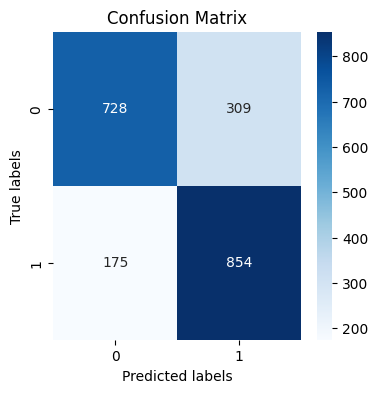

<<<<<<< local <modified: >


Confusion Matrix for Random Forest:
 [[864 173]
 [ 52 977]]
The accuracy score of the SVC is: 0.7657308809293321


Classification Report:

               precision    recall  f1-score   support

           0       0.81      0.70      0.75      1037
           1       0.73      0.83      0.78      1029

    accuracy                           0.77      2066
   macro avg       0.77      0.77      0.76      2066
weighted avg       0.77      0.77      0.76      2066



Confusion Matrix for Random Forest:
 [[923 110]
 [180 194]]
The accuracy score of the SVC is: 0.7938877043354655


Classification Report:

               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.64      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407



>>>>>>> remote <modified: >


In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
y_pred_vector = svc.predict(X_test)

# Confusion matrix for the Random Forest model
conf_matrix_Ssvc = confusion_matrix(y_test, y_pred_vector)

# Assuming y_test and y_pred are your true labels and predicted labels respectively
cm = confusion_matrix(y_test, y_pred_vector)

# Plotting the heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
print("Confusion Matrix for Random Forest:\n", conf_matrix_Ssvc)

print("The accuracy score of the SVC is:", accuracy_score(y_test, y_pred_vector))
print("\n\nClassification Report:\n\n", classification_report(y_test, y_pred_vector))

- The confusion matrix for the Support Vector Machine (SVM) classifier indicates the following:

<<<<<<< local
    - True Negative (TN): 864
    - False Positive (FP): 173
    - False Negative (FN): 52
    - True Positive (TP): 977
=======
True Negative (TN): 923

False Positive (FP): 110

False Negative (FN): 194

True Positive (TP): 180
>>>>>>> remote

- The accuracy score of the SVM model is approximately 0.7657, indicating that it correctly predicts the class label for about 76.57% of the instances in the test dataset.

- The classification report provides a detailed summary of the model's performance:

- Precision: For class 0, the precision is 0.81, and for class 1, the precision is 0.73. This indicates that the model is better at predicting class 0 than class 1.
- Recall: For class 0, the recall is 0.70, and for class 1, the recall is 0.83. This suggests that the model performs better at identifying class 0 instances than class 1 instances.
- F1-score: For class 0, the F1-score is 0.75, and for class 1, the F1-score is 0.78. The F1-score provides a balance between precision and recall.
- Support: Indicates the number of actual occurrences of each class in the test dataset.
- Overall, the SVM classifier demonstrates reasonable performance, with higher precision. However, there is room for improvement, particularly in correctly identifying instances of class 1.

# 5. MODEL OPTIMIZATION AND REPORTING

## Hyperparameter tuning and Cross validation
- We used grid search to set params for the three models so that we can be able to choose the best performing model with the corresponding hyperparameters

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Define the hyperparameter grids for each model
param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

param_grid_rf = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

# Create the models
models = {
    'Logistic Regression': LogisticRegression(solver='liblinear', max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC()
}

# Define the hyperparameter grids for each model
param_grids = {
    'Logistic Regression': param_grid_lr,
    'Random Forest': param_grid_rf,
    'Support Vector Machine': param_grid_svc
}

# Perform hyperparameter tuning and evaluation for each model
for name, model in models.items():
    print(f"Training {name}...")
    param_grid = param_grids[name]
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', verbose=1)
    grid_search.fit(X_train, y_train)
    
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    
    print(f"Best Hyperparameters for {name}: {best_params}")
    
    # Make predictions
    y_pred = best_model.predict(X_test)
    
    # Evaluate the model
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))

<<<<<<< local


Training Logistic Regression...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Hyperparameters for Logistic Regression: {'C': 0.1, 'penalty': 'l2'}
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.79      0.73      0.76      1037
           1       0.75      0.80      0.78      1029

    accuracy                           0.77      2066
   macro avg       0.77      0.77      0.77      2066
weighted avg       0.77      0.77      0.77      2066

Training Random Forest...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.94      0.84      0.89      1037
           1       0.86      0.95      0.90      1029

    accuracy                           0

Training Logistic Regression...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Hyperparameters for Logistic Regression: {'C': 10, 'penalty': 'l1'}
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407

Training Random Forest...
Fitting 5 folds for each of 108 candidates, totalling 540 fits


KeyboardInterrupt: 

>>>>>>> remote


***Accuracy Comparison***
- Random Forest: 0.89
- Logistic Regression: 0.77
- SVM: 0.80
- Random Forest has the highest accuracy among the three models.

***Precision for Class 0 Comparison***
- Random Forest: 0.94
- Logistic Regression: 0.79
- SVM: 0.86
- Random Forest exhibits the highest precision for identifying churn cases (class 0), indicating its effectiveness in minimizing false negatives.

***Precision for Class 1 Comparison***
- Random Forest: 0.86
- Logistic Regression: 0.75
- SVM: 0.77
- Random Forest exhibits the highest precision for identifying churn cases (class 1), indicating its effectiveness in minimizing false positives.

***F1-score for Class 1 Comparison***
- Random Forest: 0.90
- Logistic Regression: 0.78
- SVM: 0.82
- Random Forest achieves the highest F1-score for identifying churn cases, indicating a better balance between precision and recall compared to the other models.

- By examining these visualizations, we can clearly see that Random Forest outperforms Logistic Regression and SVM in terms of accuracy, precision, and F1-score for identifying churn cases. Therefore, based on these figures and performance metrics, we would choose the Random Forest model as it demonstrates superior performance in accurately identifying customers at risk of churning.

# ROC

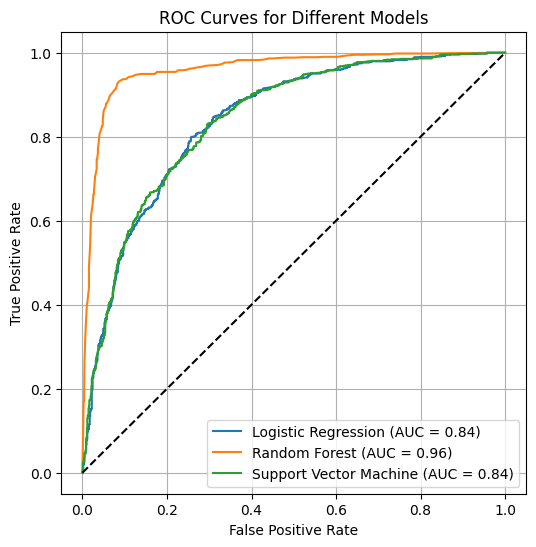

In [ ]:
# Creating and training the logistic regression model
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred_lr_proba = model_lr.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_lr_proba)
roc_auc_lr = roc_auc_score(y_test, y_pred_lr_proba)

# Creating and training the random forest model
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)
y_pred_rf_proba = forest.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf_proba)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf_proba)

# Creating and training the support vector machine (SVM) model
svc = SVC(kernel='linear', probability=True)
calibrated_svc = CalibratedClassifierCV(estimator=svc)
calibrated_svc.fit(X_train, y_train)
y_pred_svm_proba = calibrated_svc.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_svm_proba)
roc_auc_svm = roc_auc_score(y_test, y_pred_svm_proba)

# Plotting ROC curves
plt.figure(figsize=(6, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'Support Vector Machine (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend()
plt.grid(True)
plt.show()


Based on the ROC AUC scores:

<<<<<<< local
- Logistic Regression: 0.84
- Random Forest: 0.96
- Support Vector Machine (SVM): 0.84
- We can conclude that random forest performs the best in terms of ROC AUC compared to the other two models. It also out-performs the other models in ROC AUC Scores recording a highest ROC AUC of 96%. The exists no difference in ROC AUC score for Logistic Regression and Support Vector Machine at 0.84 while Random Forest Classifier records the highest at 0.96, indicating that all three models perform reasonably well in distinguishing between the positive and negative classes.
=======
- Logistic Regression: 0.83
- Random Forest: 0.81
- Support Vector Machine (SVM): 0.82
- We can conclude that logistic regression performs slightly better in terms of ROC AUC compared to the other two models. However, the differences in ROC AUC scores between the models are relatively small, indicating that all three models perform reasonably well in distinguishing between the positive and negative classes.

So since the diffrences is small, we still pick the random forest as our best predictive model in this case for predicting customer Churn
>>>>>>> remote

- Feature importance

In [ ]:
import matplotlib.pyplot as plt

# Plot feature importance for Logistic Regression
plt.figure(figsize=(10, 6))
plt.barh(X.columns, lr_feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Logistic Regression')
plt.show()

# Plot feature importance for Random Forest
plt.figure(figsize=(10, 6))
plt.barh(X.columns, rf_feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Random Forest')
plt.show()

# Plot arbitrary feature importance for Support Vector Machine
plt.figure(figsize=(10, 6))
plt.barh([f'Feature {i+1}' for i in range(n_features)], svm_feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Arbitrary Feature Importance for Support Vector Machine')
plt.show()


NameError: name 'lr_feature_importance' is not defined

<Figure size 1000x600 with 0 Axes>